# Ch.6 Applications: Explore

This notebook contains my work done on the exercises and applications in Ch.6 Applications: Explore of the [Introduction to Modern Statistics Book](https://openintro-ims.netlify.app/index.html).

In [1]:
import pandas as pd
import numpy as np

from pandas.api.types import CategoricalDtype

from collections import defaultdict, Counter

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import matplotlib.dates as mdates

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

import datastats.singlevar as dssv
import datastats.multivar as dsmv
import datastats.hypotest as dsht
import datastats.plotting as dsplt

In [2]:
dsplt.SetParams()

In [3]:
sns.color_palette("cividis")

[(0.130669, 0.231458, 0.43284),
 (0.298421, 0.332247, 0.423973),
 (0.42512, 0.431334, 0.447692),
 (0.555393, 0.537807, 0.471147),
 (0.695985, 0.648334, 0.440072),
 (0.849223, 0.771947, 0.359729)]

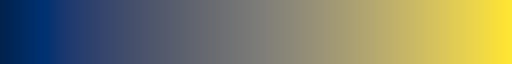

In [4]:
sns.color_palette("cividis", as_cmap=True)

### Tutorial - Part 1

In [5]:
# Load and combine the comics datasets

df_DC = pd.read_csv('datasets/dc-wikia-data.csv')
df_marvel = pd.read_csv('datasets/marvel-wikia-data.csv')

df_DC['studio'] = 'DC'
df_marvel['studio'] = 'Marvel'

# The marvel data uses a different column name for YEAR
# Change it to match
df_marvel.rename(columns={'Year':'YEAR'}, inplace=True)

df_comics = pd.concat([df_DC, df_marvel], axis=0)
df_comics

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,studio
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0,DC
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0,DC
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0,DC
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0,DC
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0,DC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN,Marvel
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN,Marvel
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN,Marvel
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN,Marvel


In [6]:
# Cleaning

# Remove superfluous strings in values
df_comics['ALIGN'] = df_comics['ALIGN'].str.replace(' Characters', '')
df_comics['EYE'] = df_comics['EYE'].str.replace(' Eyes', '')
df_comics['HAIR'] = df_comics['HAIR'].str.replace(' Hair', '')
df_comics['SEX'] = df_comics['SEX'].str.replace(' Characters', '')
df_comics['ALIVE'] = df_comics['ALIVE'].str.replace(' Characters', '')
df_comics['GSM'] = df_comics['GSM'].str.replace(' Characters', '')
df_comics['ID'] = df_comics['ID'].str.replace(' Identity', '')
df_comics['ID'] = df_comics['ID'].str.replace('Identity ', '')

# Change the dtypes of year and appearances from float to int
df_comics['APPEARANCES'] = df_comics['APPEARANCES'].astype('Int64')
df_comics['YEAR'] = df_comics['YEAR'].astype('Int64')

In [7]:
df_comics[df_comics['APPEARANCES'].isna() == False]

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,studio
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret,Good,Blue,Black,Male,NaN,Living,3093,"1939, May",1939,DC
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret,Good,Blue,Black,Male,NaN,Living,2496,"1986, October",1986,DC
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret,Good,Brown,Brown,Male,NaN,Living,1565,"1959, October",1959,DC
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public,Good,Brown,White,Male,NaN,Living,1316,"1987, February",1987,DC
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret,Good,Blue,Black,Male,NaN,Living,1237,"1940, April",1940,DC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,625364,Visher-Rakk (Earth-616),\/Visher-Rakk_(Earth-616),Secret,Bad,NaN,NaN,NaN,NaN,Living,1,NaN,<NA>,Marvel
15276,708936,Weapon Red (Chinese Mutant) (Earth-616),\/Weapon_Red_(Chinese_Mutant)_(Earth-616),Secret,Bad,White,Black,Male,NaN,Deceased,1,NaN,<NA>,Marvel
15277,633140,Wolfgang von Roehm (Earth-616),\/Wolfgang_von_Roehm_(Earth-616),Secret,Neutral,NaN,NaN,Male,NaN,Living,1,NaN,<NA>,Marvel
15278,715281,Xan (Earth-616),\/Xan_(Earth-616),No Dual,Bad,Yellow,Black,Male,NaN,Deceased,1,NaN,<NA>,Marvel


In [8]:
df_comics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23272 entries, 0 to 16375
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   page_id           23272 non-null  int64 
 1   name              23272 non-null  object
 2   urlslug           23272 non-null  object
 3   ID                17489 non-null  object
 4   ALIGN             19859 non-null  object
 5   EYE               9877 non-null   object
 6   HAIR              16734 non-null  object
 7   SEX               22293 non-null  object
 8   GSM               154 non-null    object
 9   ALIVE             23266 non-null  object
 10  APPEARANCES       21821 non-null  Int64 
 11  FIRST APPEARANCE  22388 non-null  object
 12  YEAR              22388 non-null  Int64 
 13  studio            23272 non-null  object
dtypes: Int64(2), int64(1), object(11)
memory usage: 2.7+ MB


In [9]:
df_comics.GSM.value_counts()

Homosexual       120
Bisexual          29
Transgender        2
Transvestites      1
Pansexual          1
Genderfluid        1
Name: GSM, dtype: int64

In [10]:
df_comics[df_comics.GSM == 'Bisexual']

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,studio
48,1704,John Constantine (New Earth),\/wiki\/John_Constantine_(New_Earth),Public,Good,Blue,Blond,Male,Bisexual,Living,371,"1984, June",1984,DC
292,1614,Grace Choi (New Earth),\/wiki\/Grace_Choi_(New_Earth),Secret,Good,Brown,Red,Female,Bisexual,Living,100,"2003, August",2003,DC
301,16693,Tef\u00e9 Holland (New Earth),\/wiki\/Tef%C3%A9_Holland_(New_Earth),NaN,Bad,Blue,White,Female,Bisexual,Living,97,"1989, December",1989,DC
555,4780,Knockout (New Earth),\/wiki\/Knockout_(New_Earth),Secret,Bad,Blue,Red,Female,Bisexual,Living,53,"1994, February",1994,DC
750,4829,Sigrid Nansen (New Earth),\/wiki\/Sigrid_Nansen_(New_Earth),Public,Good,Blue,White,Female,Bisexual,Living,38,"1986, November",1986,DC
824,10546,Courtney Mason (New Earth),\/wiki\/Courtney_Mason_(New_Earth),Public,Good,Blue,Blond,Female,Bisexual,Deceased,34,"1993, July",1993,DC
886,19048,Mortimer Drake (New Earth),\/wiki\/Mortimer_Drake_(New_Earth),Secret,Bad,Brown,Brown,Male,Bisexual,Living,32,"1943, November",1943,DC
1294,1974,Desire (New Earth),\/wiki\/Desire_(New_Earth),Secret,Neutral,Yellow,NaN,Genderless,Bisexual,Living,20,"1989, November",1989,DC
1490,132256,Frostbite (New Earth),\/wiki\/Frostbite_(New_Earth),Secret,Good,Blue,Blue,Male,Bisexual,Living,17,"1997, June",1997,DC
1557,132260,George Sloan (New Earth),\/wiki\/George_Sloan_(New_Earth),Secret,Good,NaN,NaN,Male,Bisexual,Living,16,"1997, June",1997,DC


Do the same operations as done in the tutorial

In [11]:
df_comics.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,studio
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret,Good,Blue,Black,Male,NaN,Living,3093,"1939, May",1939,DC
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret,Good,Blue,Black,Male,NaN,Living,2496,"1986, October",1986,DC
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret,Good,Brown,Brown,Male,NaN,Living,1565,"1959, October",1959,DC
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public,Good,Brown,White,Male,NaN,Living,1316,"1987, February",1987,DC
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret,Good,Blue,Black,Male,NaN,Living,1237,"1940, April",1940,DC


In [12]:
df_comics.ALIGN.unique()

array(['Good', 'Bad', 'Neutral', nan, 'Reformed Criminals'], dtype=object)

In [13]:
df_comics.ID.unique()

array(['Secret', 'Public', nan, 'Unknown', 'No Dual',
       'Known to Authorities'], dtype=object)

In [14]:
pd.crosstab(index=df_comics.ALIGN, columns=df_comics.ID)

ID,Known to Authorities,No Dual,Public,Secret,Unknown
ALIGN,,,,,
Bad,3,474,2172,4490,7
Good,10,647,2930,2465,0
Neutral,2,390,965,957,2
Reformed Criminals,0,0,1,1,0


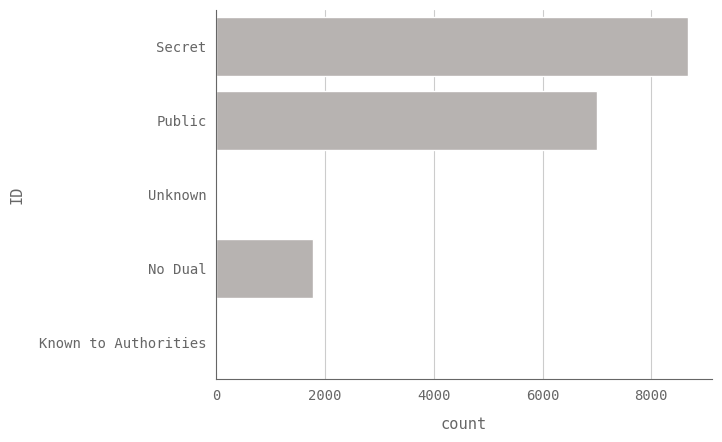

In [15]:
g = sns.countplot(y='ID', data=df_comics, orient='h', palette=['#b8b3b0'])
sns.despine()

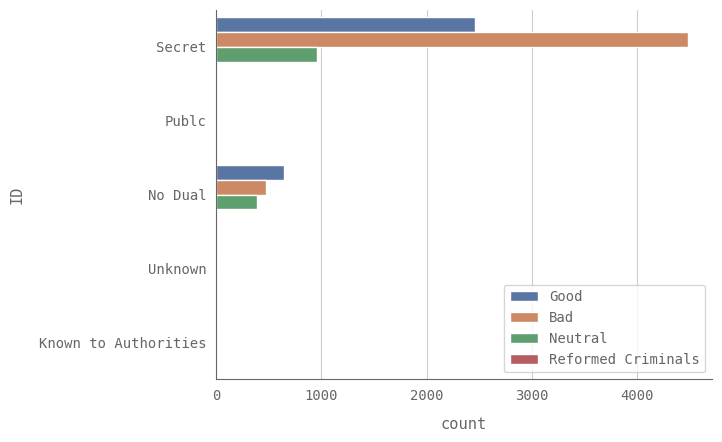

In [16]:
# Can use seaborn to show breakdown of alignments within IDs, but not in stacked form like the tutorial

g = sns.countplot(y='ID', data=df_comics, orient='h', hue='ALIGN', 
                  order=['Secret', 'Publc', 'No Dual', 'Unknown', 'Known to Authorities'])

g.legend(loc='lower right')
sns.despine()

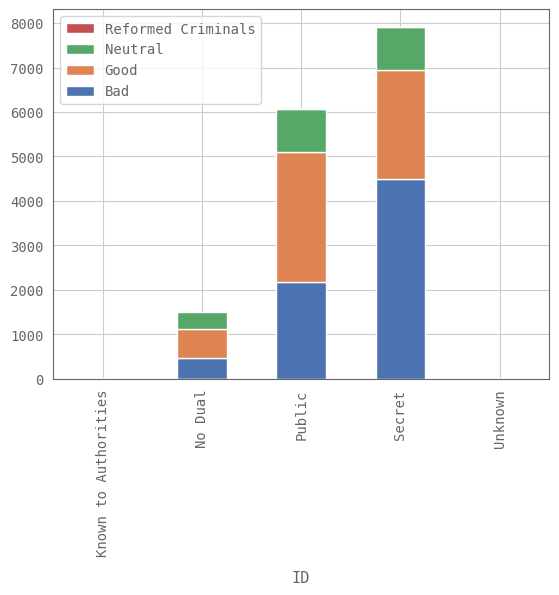

In [17]:
# To do a stacked count broken down in this way, can use pandas plot on a crosstab dataframe

ax = pd.crosstab(index=df_comics.ID, columns=df_comics.ALIGN).plot(kind='bar', stacked=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

In [18]:
# Change the contingency table to show proportions
# Shows the proportions of all the possible combinations
# Meaning all the proportions in the table add up to 1
pd.crosstab(index=df_comics.ALIGN, columns=df_comics.ID, normalize=True)

ID,Known to Authorities,No Dual,Public,Secret,Unknown
ALIGN,,,,,
Bad,0.000193,0.030549,0.139985,0.289379,0.000451
Good,0.000644,0.041699,0.188837,0.158868,0.000000
Neutral,0.000129,0.025135,0.062194,0.061678,0.000129
Reformed Criminals,0.000000,0.000000,0.000064,0.000064,0.000000


In [19]:
# If I want conditional 'row-wise' proportions I can use groupby and value_counts with normalize=True
df_comics.groupby(by='ALIGN').ID.value_counts(normalize=True)

ALIGN               ID                  
Bad                 Secret                  0.628324
                    Public                  0.303946
                    No Dual                 0.066331
                    Unknown                 0.000980
                    Known to Authorities    0.000420
Good                Public                  0.484137
                    Secret                  0.407303
                    No Dual                 0.106907
                    Known to Authorities    0.001652
Neutral             Public                  0.416667
                    Secret                  0.413212
                    No Dual                 0.168394
                    Known to Authorities    0.000864
                    Unknown                 0.000864
Reformed Criminals  Public                  0.500000
                    Secret                  0.500000
Name: ID, dtype: float64

In [20]:
# Then using unstack will put it in a pivot table format
df_comics.groupby(by='ALIGN').ID.value_counts(normalize=True).unstack()

ID,Known to Authorities,No Dual,Public,Secret,Unknown
ALIGN,,,,,
Bad,0.000420,0.066331,0.303946,0.628324,0.000980
Good,0.001652,0.106907,0.484137,0.407303,NaN
Neutral,0.000864,0.168394,0.416667,0.413212,0.000864
Reformed Criminals,NaN,NaN,0.500000,0.500000,NaN


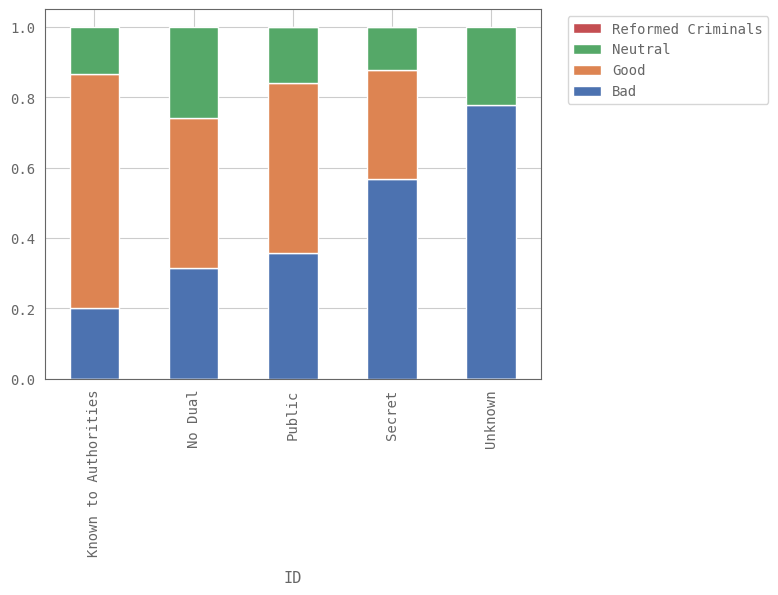

In [21]:
# Can then plot this
ax = df_comics.groupby(by='ID').ALIGN.value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],frameon=True, bbox_to_anchor=(1.04,1), loc="upper left")

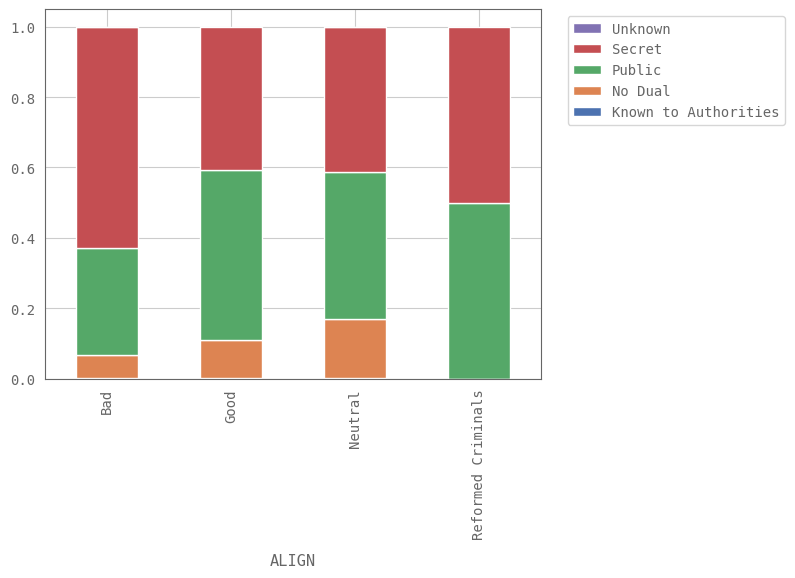

In [22]:
# Can also switch the conditioning by changing what we groupby
ax = df_comics.groupby(by='ALIGN').ID.value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],frameon=True, bbox_to_anchor=(1.04,1), loc="upper left")

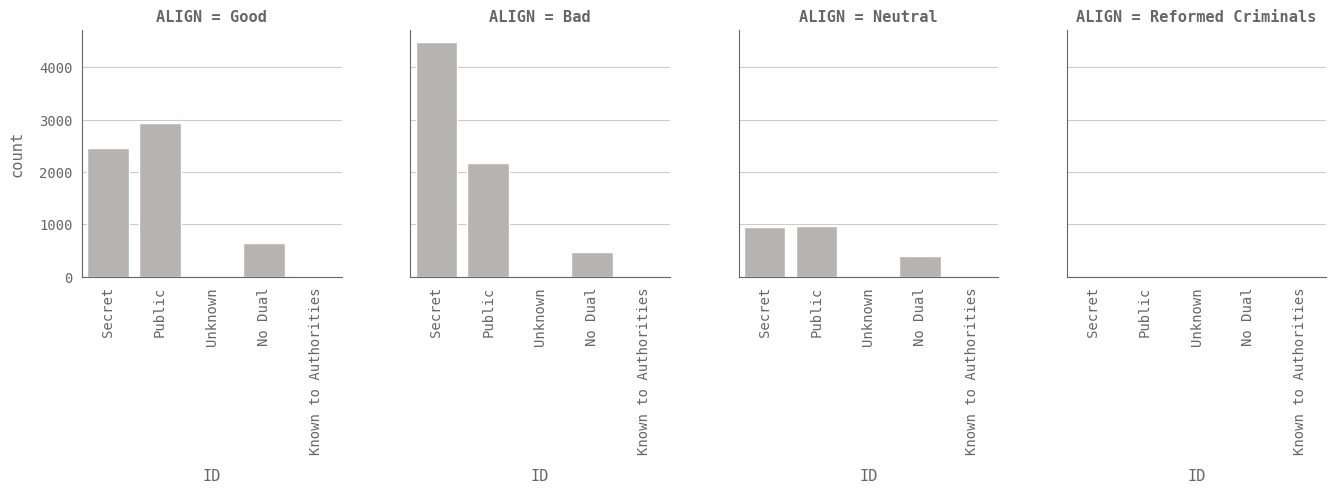

In [23]:
g = sns.catplot(kind='count', x='ID', col='ALIGN', data=df_comics, palette=['#b8b3b0'], height=3.5)
g.set_xticklabels(rotation=90)

### Tutorial - Part 2

In [24]:
# I don't have the exact same dataset but I can use the seaborn one that's similar for this

df_cars = sns.load_dataset('mpg')

In [25]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [26]:
df_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


<AxesSubplot: xlabel='weight', ylabel='Count'>

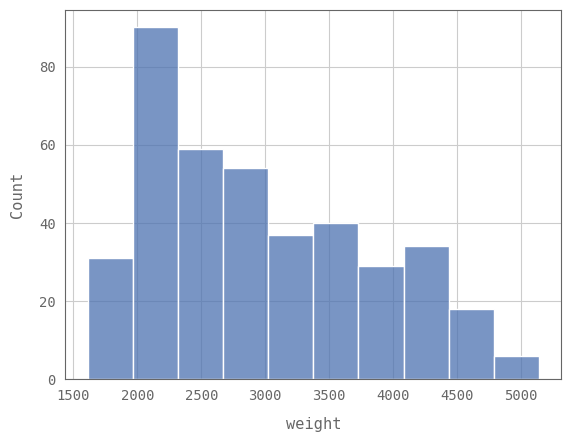

In [27]:
# I'll construct a histogram instead of a dotplot to display the weights.

sns.histplot(x='weight', data=df_cars)

<AxesSubplot: xlabel='weight'>

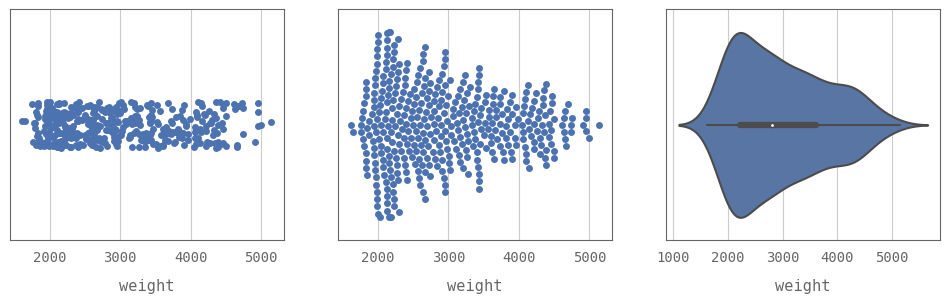

In [28]:
# Could also use a strip or swarm plot in seaborn, 
# which serves a similar purpose to a dot plot as it plots each point instead of binning or summarizing
# Violin plot is best for visualizing the distribution though, and works well when you have to compare many groups
# See this page for a comparison of these different types: https://alexgude.com/blog/distribution-plots/
fig,axes = plt.subplots(ncols=3)
fig.set_size_inches(12,3)

sns.stripplot(x='weight', data=df_cars, ax=axes[0])
sns.swarmplot(x='weight', data=df_cars, ax=axes[1])
sns.violinplot(x='weight', data=df_cars, ax=axes[2])

<AxesSubplot: xlabel='mpg', ylabel='Count'>

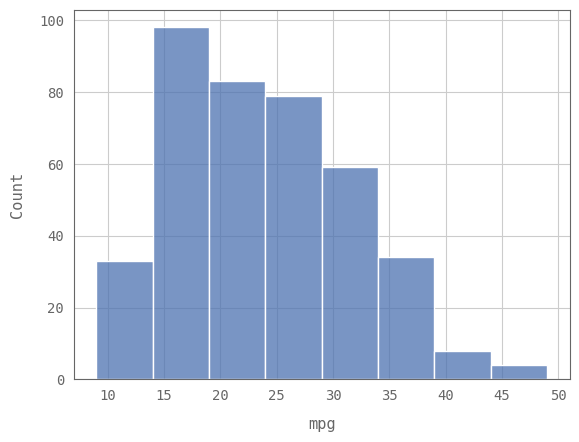

In [29]:
sns.histplot(x='mpg', data=df_cars, binwidth=5)

<AxesSubplot: xlabel='mpg', ylabel='Count'>

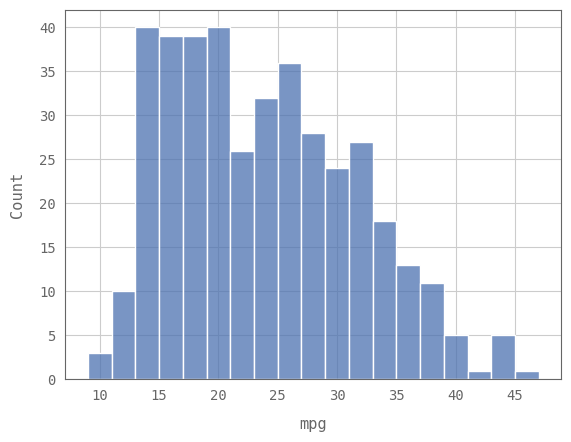

In [30]:
sns.histplot(x='mpg', data=df_cars, binwidth=2)

<AxesSubplot: xlabel='weight', ylabel='Density'>

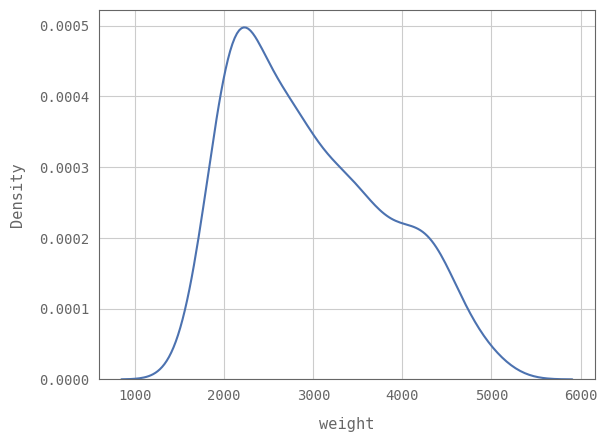

In [31]:
# Density plot
sns.kdeplot(x='weight', data=df_cars)

<AxesSubplot: xlabel='weight', ylabel='Density'>

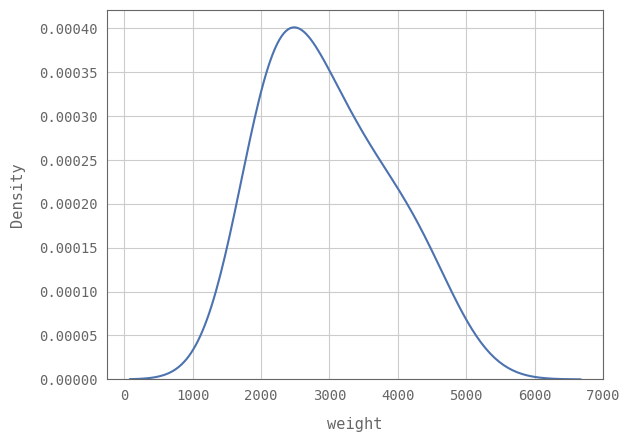

In [32]:
# Density plot - change bandwidth
sns.kdeplot(x='weight', data=df_cars, bw_adjust=2)

In [33]:
df_cars.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

Visualizing marginal distrubution (which means the total distribution for one variable) and conditional distribution which means separating the variable by another variable (a condition).

<AxesSubplot: xlabel='mpg', ylabel='Count'>

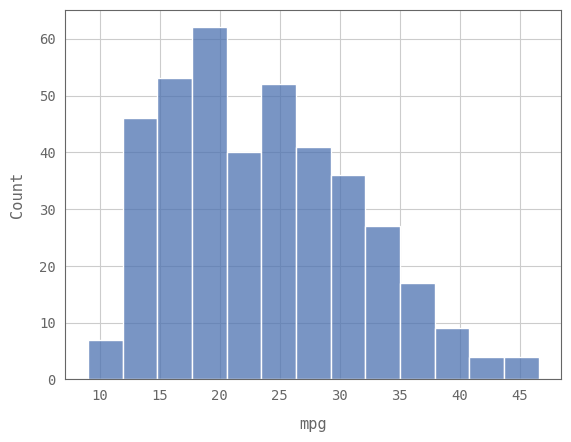

In [34]:
# Marginal distribution of mpg

sns.histplot(x='mpg', data=df_cars)

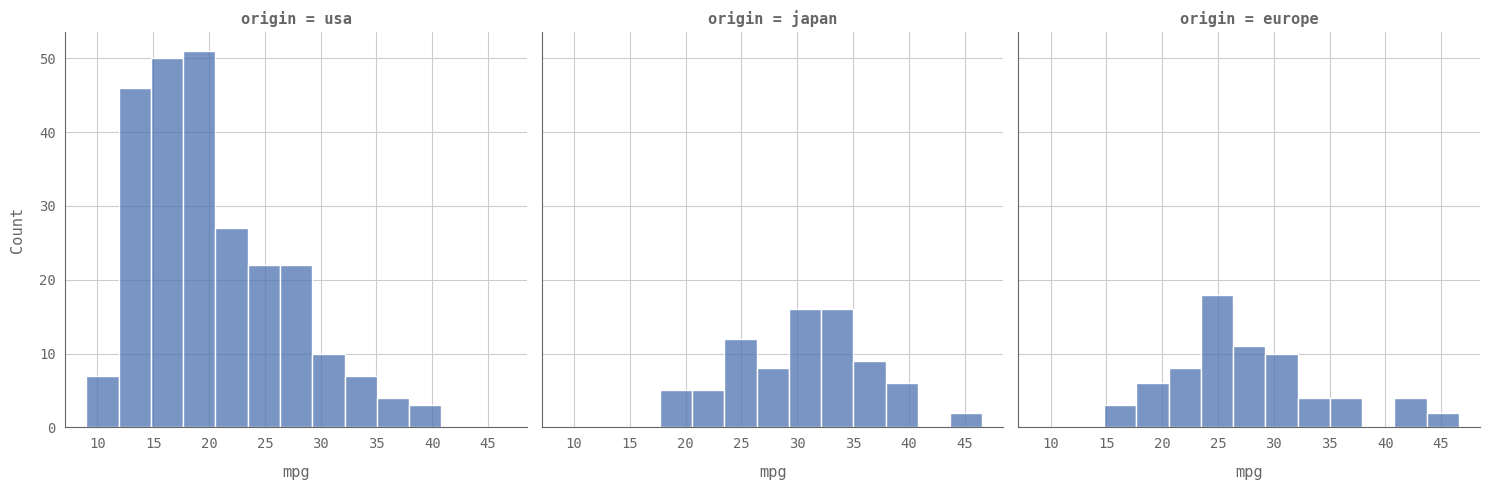

In [35]:
# Conditional distribution using histograms: mpg conditioned on origin

sns.displot(x='mpg', col='origin', data=df_cars, kind='hist')

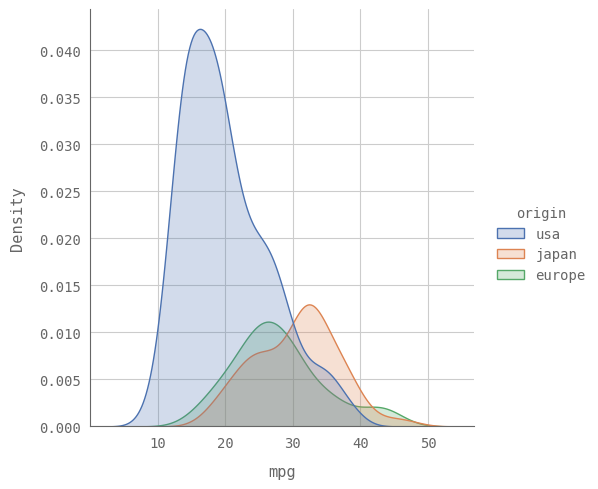

In [36]:
# Conditional distribution using density plots: mpg conditioned on origin

sns.displot(x='mpg', hue='origin', data=df_cars, kind='kde', fill=True)

In [37]:
df_cars.cylinders.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [38]:
# Reduce the dataset to just cars with the three most common cylinder values
df_cars_reduced_cyl = df_cars[df_cars.cylinders.isin([4,6,8])]
df_cars_reduced_cyl.cylinders.value_counts()

4    204
8    103
6     84
Name: cylinders, dtype: int64

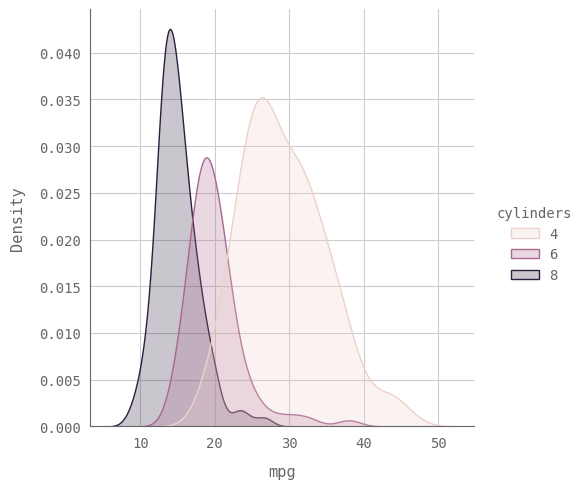

In [39]:
# Now plot conditioned on cylinders
sns.displot(x='mpg', hue='cylinders', data=df_cars_reduced_cyl, kind='kde', fill=True)

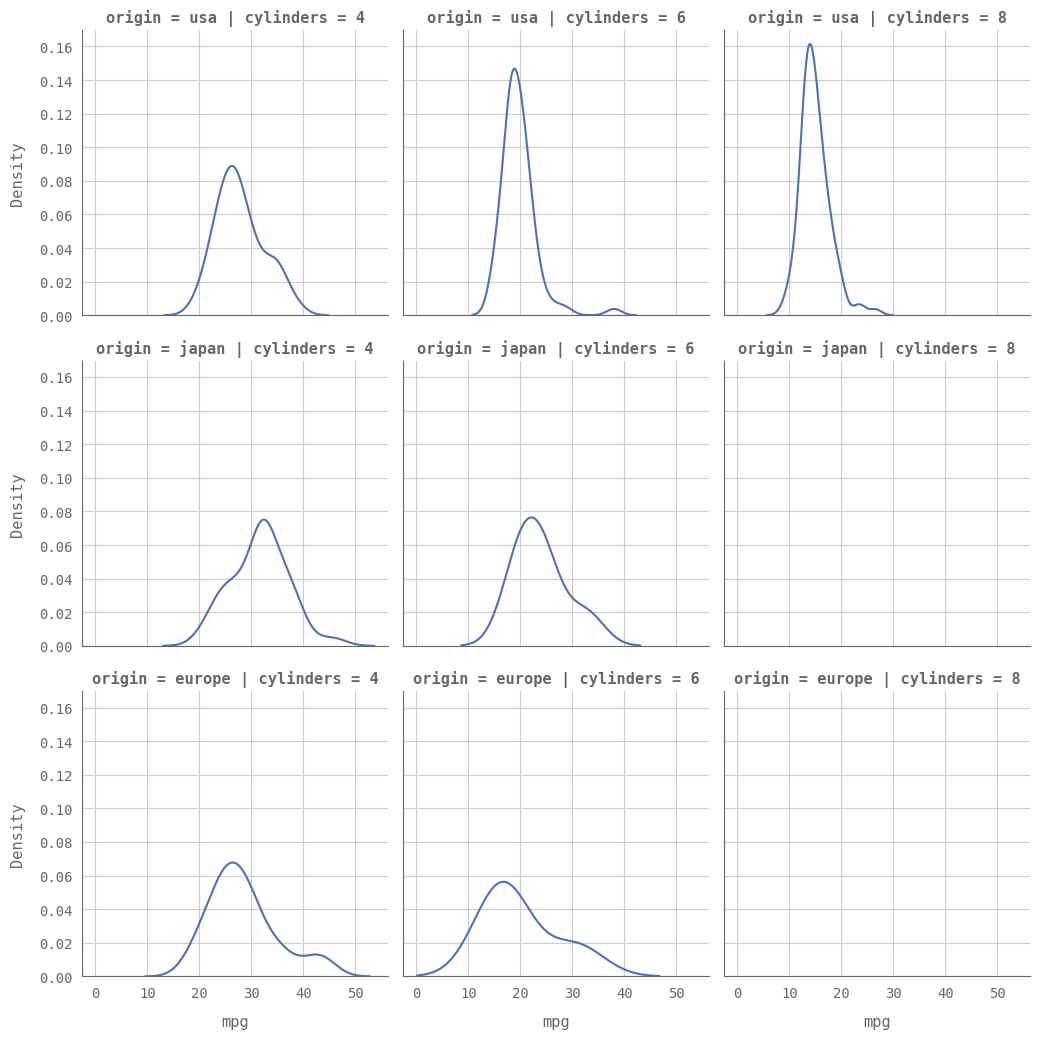

In [40]:
# I don't have price in my dataset so I'll just use other variables to create a 3-variable plot
# In seaborn the displot and catplot functions only go up to bivariate
# Need to use a Facetgrid for more than 2 variables
# The 8 cylinder plots are blank for Europe and Japan becuase there are no 8 cylinder cars in the set from those countries

g = sns.FacetGrid(df_cars_reduced_cyl, row='origin', col='cylinders', height=3.5, aspect=1)
g.map(sns.kdeplot, 'mpg')

In [41]:
# To get counts can use a contingency table
pd.crosstab(df_cars_reduced_cyl.cylinders, df_cars_reduced_cyl.origin)

origin,europe,japan,usa
cylinders,,,
4,63,69,72
6,4,6,74
8,0,0,103


### Tutorial - part 3

In [42]:
# Load the county dataset
df_county = pd.read_csv('datasets/county.csv')
df_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               3142 non-null   object 
 1   state              3142 non-null   object 
 2   pop2000            3139 non-null   float64
 3   pop2010            3142 non-null   int64  
 4   pop2017            3139 non-null   float64
 5   pop_change         3139 non-null   float64
 6   poverty            3140 non-null   float64
 7   homeownership      3142 non-null   float64
 8   multi_unit         3142 non-null   float64
 9   unemployment_rate  3139 non-null   float64
 10  metro              3139 non-null   object 
 11  median_edu         3140 non-null   object 
 12  per_capita_income  3140 non-null   float64
 13  median_hh_income   3140 non-null   float64
 14  smoking_ban        2562 non-null   object 
dtypes: float64(9), int64(1), object(5)
memory usage: 368.3+ KB


In [43]:
df_county.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial
3,Bibb County,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none
4,Blount County,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none


My county dataset doesn't have life expectancy so I'll just use median_hh_income

In [44]:
df_county_ma = df_county.loc[df_county.state == 'Massachusetts'].copy()

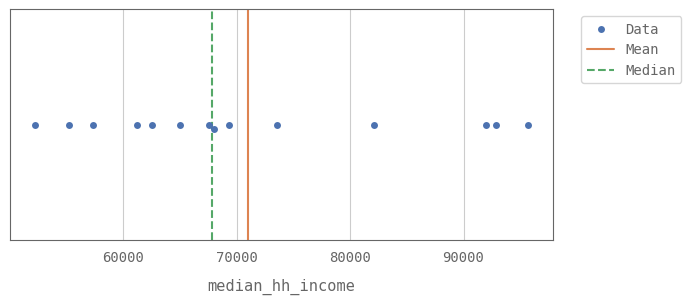

In [45]:
fig,ax = plt.subplots()
fig.set_size_inches(7,3)

sns.swarmplot(x='median_hh_income', data=df_county_ma, ax=ax, 
              label='Data')

# Add a line for the mean
plt.axvline(df_county_ma.median_hh_income.mean(), color='C1', 
            label='Mean')

# Add a line for the median
plt.axvline(df_county_ma.median_hh_income.median(), color='C2', 
            label='Median', ls='--')

ax.legend(frameon=True, bbox_to_anchor=(1.04,1), loc="upper left")

In [46]:
# Create a new variable called west_coast: True if state is California, Oregon or Washington, False otherwise
df_county['west_coast'] = df_county['state'].isin(['California', 'Oregon', 'Washington'])
df_county['west_coast'].value_counts()

False    3009
True      133
Name: west_coast, dtype: int64

In [47]:
df_county.groupby('west_coast').median_hh_income.agg(['mean', 'median'])

,mean,median
west_coast,,
False,49506.525773,47878.0
True,55617.954887,51842.0


Follow the steps done in the variance and standard deviation section

In [48]:
df_county_ma['deviation'] = df_county_ma['median_hh_income'] - np.mean(df_county_ma['median_hh_income'])
df_county_ma[['median_hh_income', 'deviation']]

,median_hh_income,deviation
1217,68048.0,-2982.714286
1218,55190.0,-15840.714286
1219,62514.0,-8516.714286
1220,67535.0,-3495.714286
1221,73533.0,2502.285714
1222,57307.0,-13723.714286
1223,52205.0,-18825.714286
1224,64974.0,-6056.714286
1225,92878.0,21847.285714
1226,91942.0,20911.285714


In [49]:
df_county_ma['deviation_sq'] = df_county_ma['deviation']**2
df_county_ma[['median_hh_income', 'deviation', 'deviation_sq']]

,median_hh_income,deviation,deviation_sq
1217,68048.0,-2982.714286,8.896585e+06
1218,55190.0,-15840.714286,2.509282e+08
1219,62514.0,-8516.714286,7.253442e+07
1220,67535.0,-3495.714286,1.222002e+07
1221,73533.0,2502.285714,6.261434e+06
1222,57307.0,-13723.714286,1.883403e+08
1223,52205.0,-18825.714286,3.544075e+08
1224,64974.0,-6056.714286,3.668379e+07
1225,92878.0,21847.285714,4.773039e+08
1226,91942.0,20911.285714,4.372819e+08


In [50]:
deviation_sum = sum(df_county_ma.deviation_sq)
deviation_sum

2672732222.857143

In [51]:
sample_variance = deviation_sum/(len(df_county_ma)-1)
sample_variance

205594786.37362638

In [52]:
sd = np.sqrt(sample_variance)
sd

14338.576860122012

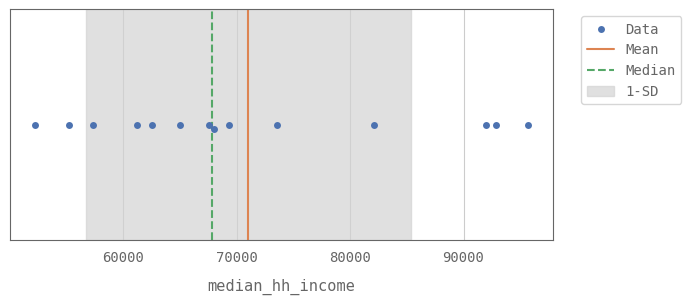

In [53]:
fig,ax = plt.subplots()
fig.set_size_inches(7,3)

sns.swarmplot(x='median_hh_income', data=df_county_ma, ax=ax, 
              label='Data')

# Add a line for the mean
plt.axvline(df_county_ma.median_hh_income.mean(), color='C1', 
            label='Mean')

# Add a line for the median
plt.axvline(df_county_ma.median_hh_income.median(), color='C2', 
            label='Median', ls='--')

# Add a line for the low ad high 1 sd line
plt.axvspan(df_county_ma.median_hh_income.mean() - sd, df_county_ma.median_hh_income.mean() + sd, color='lightgrey', 
            label='1-SD', alpha=.7)

ax.legend(frameon=True, bbox_to_anchor=(1.04,1), loc="upper left")

In [54]:
quartiles = (
df_county_ma.median_hh_income.copy()
                             .quantile([.25, .5, .75])
                             .rename({0.25:'q1', 0.50:'q2', 0.75:'q3'})
)
quartiles

q1    61560.0
q2    67791.5
q3    79944.0
Name: median_hh_income, dtype: float64

In [55]:
IQR = quartiles[2] - quartiles[0]
IQR

18384.0

In [56]:
min_value = df_county_ma.median_hh_income.min()
max_value = df_county_ma.median_hh_income.max()
value_range = max_value - min_value
print('min:{} max:{} range:{}'.format(min_value, max_value, value_range))

min:52205.0 max:95668.0 range:43463.0


Looking at shape using the county data grouped by west_coast boolean variable

<AxesSubplot: xlabel='median_hh_income', ylabel='Density'>

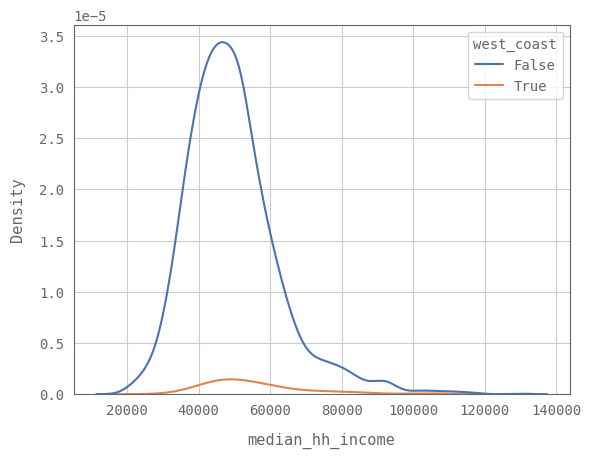

In [57]:
sns.kdeplot(x='median_hh_income', data=df_county, hue='west_coast')

<AxesSubplot: xlabel='median_hh_income', ylabel='Density'>

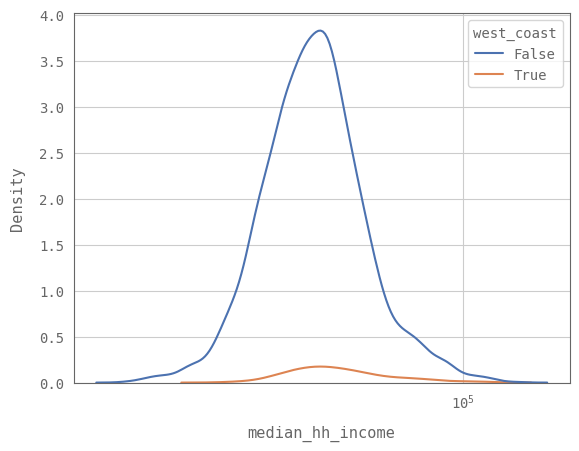

In [58]:
sns.kdeplot(x='median_hh_income', data=df_county, hue='west_coast', log_scale=True)

Looking at outliers

<AxesSubplot: xlabel='median_hh_income', ylabel='west_coast'>

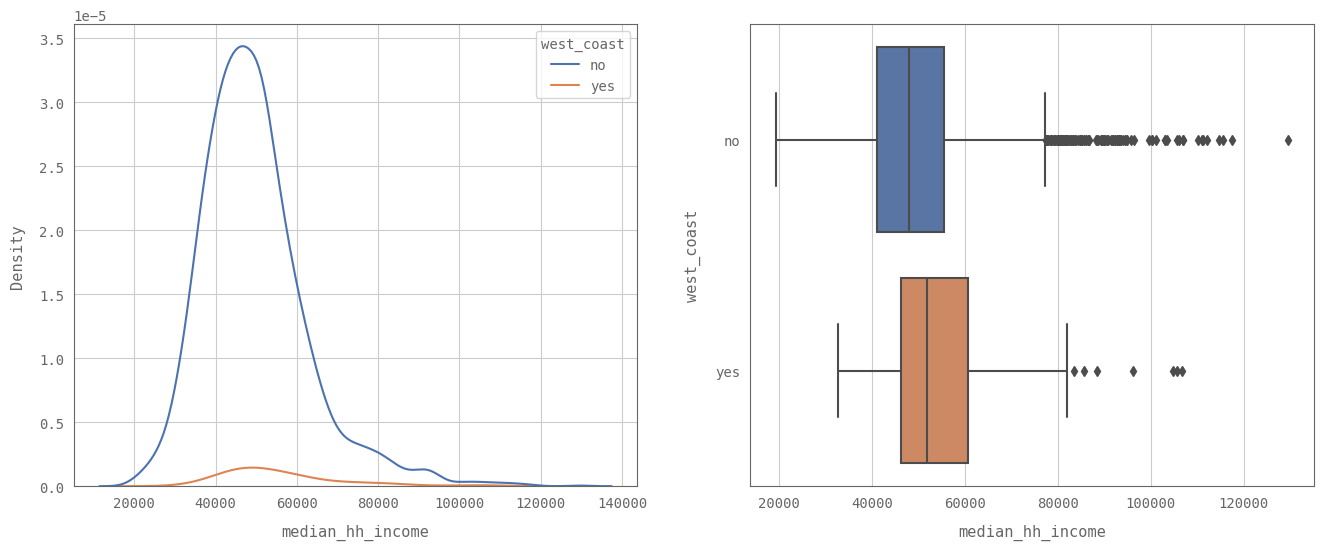

In [59]:
fig,axes = plt.subplots(ncols=2, nrows=1)
fig.set_size_inches(16,6)

# Box plot throws an exception when the grouping variable is boolean, so change to string
df_county['west_coast'] = df_county.west_coast.map({True:'yes', False:'no'})

sns.kdeplot(x='median_hh_income', data=df_county, hue='west_coast', ax=axes[0])

sns.boxplot(x='median_hh_income', y='west_coast', data=df_county, ax=axes[1])

Indicating outliers

In [60]:
df_county['is_outlier'] = df_county.median_hh_income > 75000

In [61]:
df_county['is_outlier'].value_counts()

False    2985
True      157
Name: is_outlier, dtype: int64

In [62]:
(
df_county.loc[df_county.is_outlier == True, ['name', 'state', 'median_hh_income']]
         .sort_values(by='median_hh_income', ascending=False)
)

,name,state,median_hh_income
2872,Loudoun County,Virginia,129588.0
2848,Fairfax County,Virginia,117515.0
1205,Howard County,Maryland,115576.0
2925,Falls Church city,Virginia,114795.0
2826,Arlington County,Virginia,112138.0
...,...,...,...
1794,Warren County,New Jersey,75500.0
414,Cherokee County,Georgia,75477.0
2313,Newport County,Rhode Island,75463.0
274,Jefferson County,Colorado,75170.0


<AxesSubplot: xlabel='median_hh_income', ylabel='Density'>

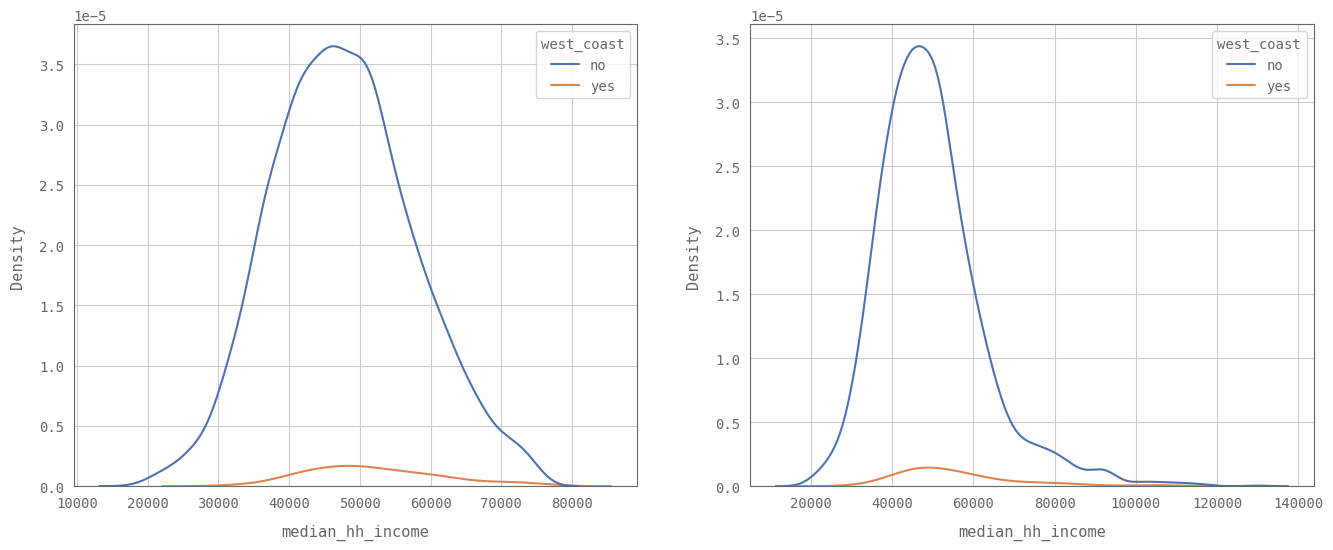

In [63]:
# Comparing plots with outliers removed (plot 1) and the original (plot 2)
fig,axes = plt.subplots(ncols=2, nrows=1)
fig.set_size_inches(16,6)

sns.kdeplot(x='median_hh_income', data=df_county[df_county.is_outlier == False], hue='west_coast', ax=axes[0])

sns.kdeplot(x='median_hh_income', data=df_county, hue='west_coast', ax=axes[1])

### Tutorial 4 - Case study with email dataset

In [64]:
df_email = pd.read_csv('datasets/email.csv')
df_email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   spam          3921 non-null   int64  
 1   to_multiple   3921 non-null   int64  
 2   from          3921 non-null   int64  
 3   cc            3921 non-null   int64  
 4   sent_email    3921 non-null   int64  
 5   time          3921 non-null   object 
 6   image         3921 non-null   int64  
 7   attach        3921 non-null   int64  
 8   dollar        3921 non-null   int64  
 9   winner        3921 non-null   object 
 10  inherit       3921 non-null   int64  
 11  viagra        3921 non-null   int64  
 12  password      3921 non-null   int64  
 13  num_char      3921 non-null   float64
 14  line_breaks   3921 non-null   int64  
 15  format        3921 non-null   int64  
 16  re_subj       3921 non-null   int64  
 17  exclaim_subj  3921 non-null   int64  
 18  urgent_subj   3921 non-null 

Compute appropriate measures of the center and spread of num_char for both spam and not spam using group_by() and summarize(). No need to name the new columns created by summarize().
Construct side-by-side box plots to visualize the association between the same two variables. It will be useful to mutate() a new column containing a log-transformed version of num_char.

In [65]:
# Box plot throws an exception when the grouping variable is boolean or int, so change to string
df_email['spam'] = df_email.spam.map({1:'yes', 0:'no'})

In [66]:
df_email.groupby('spam').num_char.describe()

,count,mean,std,min,25%,50%,75%,max
spam,,,,,,,,
no,3554.0,11.250517,14.510758,0.003,1.92525,6.831,15.5075,190.087
yes,367.0,5.439204,14.920101,0.001,0.47250,1.046,3.2905,173.956


<AxesSubplot: xlabel='spam', ylabel='num_char'>

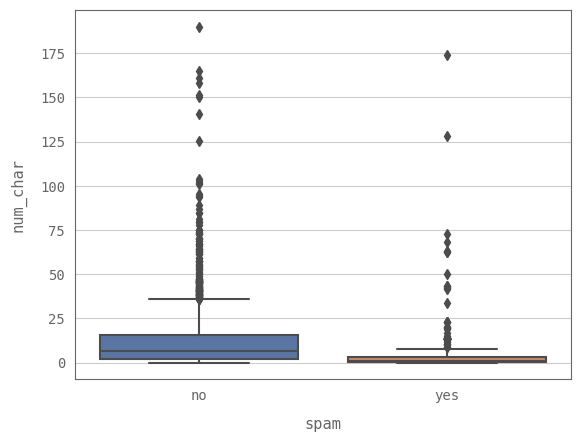

In [67]:
sns.boxplot(y='num_char', x='spam', data=df_email, orient='v')

In [68]:
df_email['log10_num_char'] = df_email.num_char.apply(np.log10)

In [69]:
df_email[['num_char', 'log10_num_char']]

,num_char,log10_num_char
0,11.370,1.055760
1,10.504,1.021355
2,7.773,0.890589
3,13.256,1.122412
4,1.231,0.090258
...,...,...
3916,0.332,-0.478862
3917,0.323,-0.490797
3918,8.656,0.937317
3919,10.185,1.007961


<AxesSubplot: xlabel='spam', ylabel='log10_num_char'>

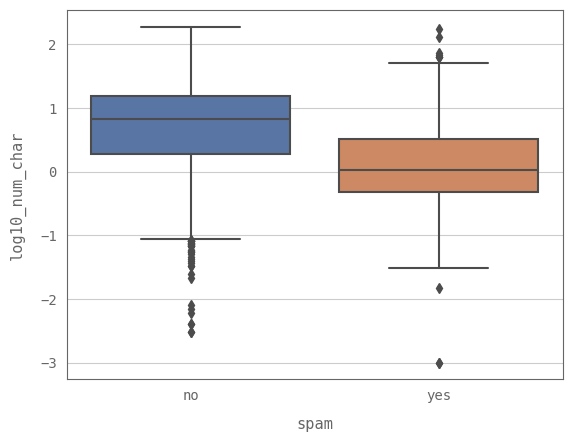

In [70]:
sns.boxplot(y='log10_num_char', x='spam', data=df_email, orient='v')

Calculate appropriate measures of the center and spread of exclaim_mess for both spam and not spam using group_by() and summarize().
Construct an appropriate plot to visualize the association between the same two variables, adding in a log-transformation step if necessary.
If you decide to use a log transformation, remember that log(0) is -Inf in R, which isn’t a very useful value! You can get around this by adding a small number (like 0.01) to the quantity inside the log() function. This way, your value is never zero. This small shift to the right won’t affect your results.

In [71]:
df_email.groupby('spam').exclaim_mess.describe()

,count,mean,std,min,25%,50%,75%,max
spam,,,,,,,,
no,3554.0,6.508160,47.609681,0.0,0.0,1.0,5.0,1236.0
yes,367.0,7.321526,79.872748,0.0,0.0,0.0,1.0,1209.0


In [72]:
df_email.exclaim_mess.value_counts(ascending=False)

0      1435
1       733
2       507
4       190
3       128
       ... 
75        1
89        1
139       1
148       1
947       1
Name: exclaim_mess, Length: 73, dtype: int64

In [73]:
pd.crosstab(index=df_email['exclaim_mess'], columns=df_email['spam'])

spam,no,yes
exclaim_mess,,
0,1219,216
1,650,83
2,482,25
3,116,12
4,185,5
...,...,...
947,1,0
1197,1,0
1203,2,0


<AxesSubplot: xlabel='exclaim_mess', ylabel='Density'>

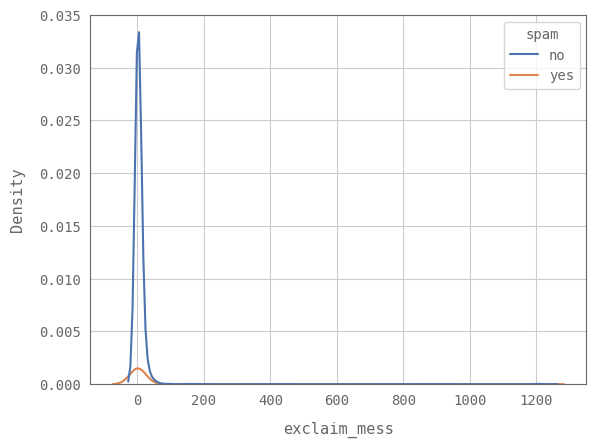

In [74]:
sns.kdeplot(x='exclaim_mess', hue='spam', data=df_email)

In [75]:
# Need to add a small number to each value in exclaim_mess to make the many zeros slightly larger than zero before transform
df_email['exclaim_mess_plus_small_num'] = df_email.exclaim_mess + 0.01

In [76]:
df_email['log10_exclaim_mess'] = df_email.exclaim_mess_plus_small_num.apply(np.log10)

In [77]:
df_email[['exclaim_mess', 'log10_exclaim_mess']]

,exclaim_mess,log10_exclaim_mess
0,0,-2.000000
1,1,0.004321
2,6,0.778874
3,48,1.681332
4,1,0.004321
...,...,...
3916,0,-2.000000
3917,0,-2.000000
3918,5,0.699838
3919,0,-2.000000


In [78]:
df_email.groupby('spam').log10_exclaim_mess.describe()

,count,mean,std,min,25%,50%,75%,max
spam,,,,,,,,
no,3554.0,-0.325042,1.274887,-2.0,-2.0,0.004321,0.699838,3.092022
yes,367.0,-1.046716,1.186405,-2.0,-2.0,-2.000000,0.004321,3.082430


<AxesSubplot: xlabel='spam', ylabel='log10_exclaim_mess'>

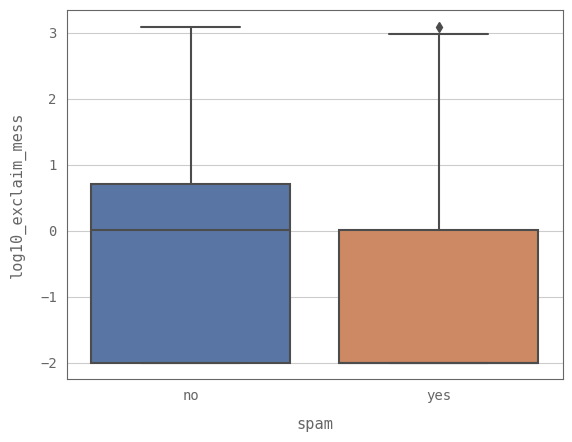

In [79]:
sns.boxplot(y='log10_exclaim_mess', x='spam', data=df_email, orient='v')

<AxesSubplot: xlabel='log10_exclaim_mess', ylabel='Density'>

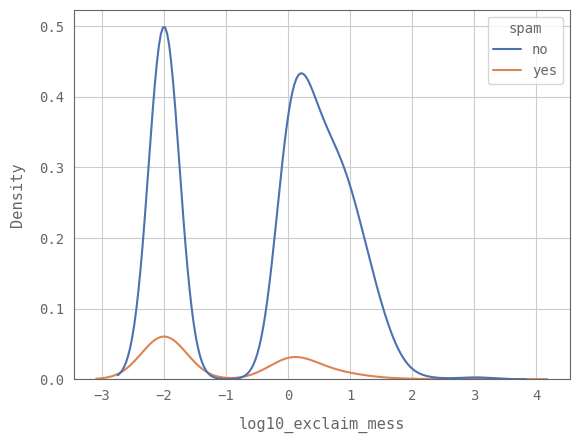

In [80]:
sns.kdeplot(x='log10_exclaim_mess', hue='spam', data=df_email)

The book suggests we can treat zero and non-zero in exclaim_mess as two categorical levels to give a clearer picture of whether spam or not spam tend to use exclamation marks more:  

Zero inflation strategies
One approach says that there are two mechanisms going on: one generating the zeros and the other generating the non-zeros, so we will analyze these two groups separately. A simpler approach is to think of the variable as two level categorical variable (zero or not zero) and to treat it like a categorical variable.

In [81]:
df_email['exclaim_mess_contains_mark'] = df_email.exclaim_mess != 0
df_email[['exclaim_mess', 'exclaim_mess_contains_mark']]

,exclaim_mess,exclaim_mess_contains_mark
0,0,False
1,1,True
2,6,True
3,48,True
4,1,True
...,...,...
3916,0,False
3917,0,False
3918,5,True
3919,0,False


<AxesSubplot: xlabel='spam', ylabel='count'>

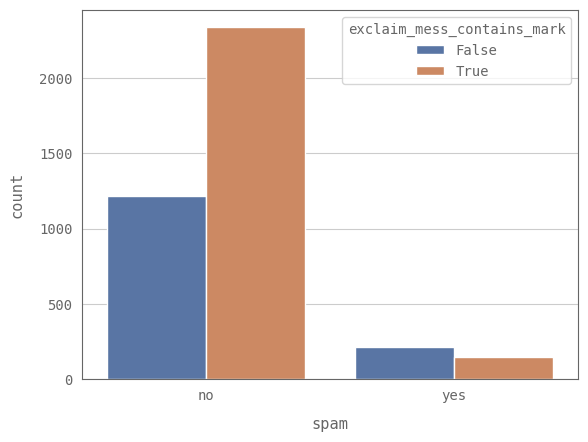

In [82]:
sns.countplot(x='spam', hue ='exclaim_mess_contains_mark', data=df_email)

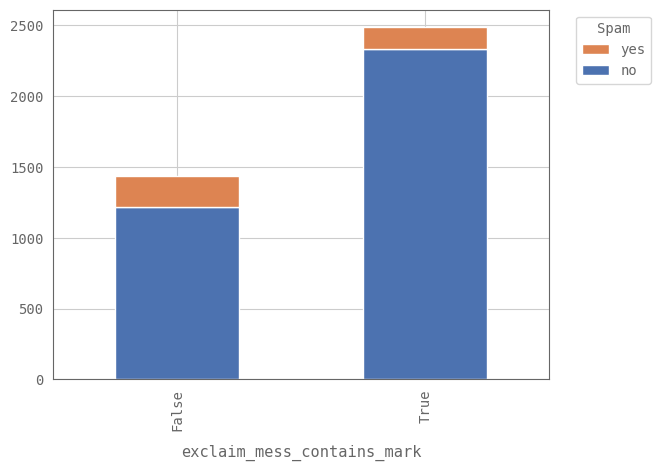

In [83]:
ax = pd.crosstab(index=df_email.exclaim_mess_contains_mark, columns=df_email.spam).plot(kind='bar', stacked=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],frameon=True, bbox_to_anchor=(1.04,1), loc="upper left", title='Spam')

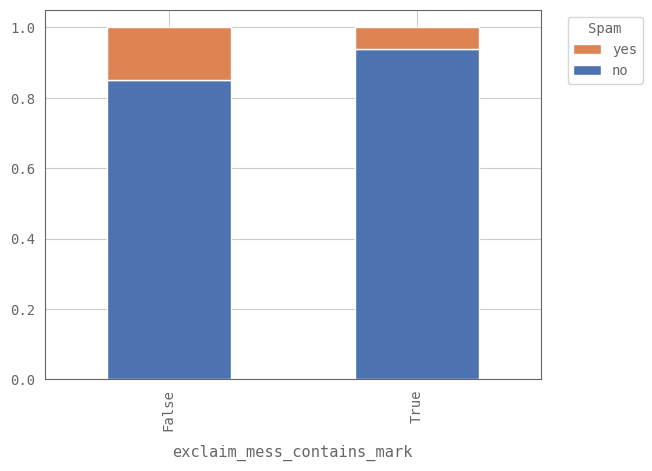

In [84]:
# Plot again using proportions
ax = df_email.groupby(by='exclaim_mess_contains_mark').spam.value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],frameon=True, bbox_to_anchor=(1.04,1), loc="upper left", title='Spam')

Analysis of image variable

In [85]:
df_email.image.value_counts()

0     3811
1       76
2       17
3       11
5        2
4        2
20       1
9        1
Name: image, dtype: int64

<AxesSubplot: xlabel='image', ylabel='count'>

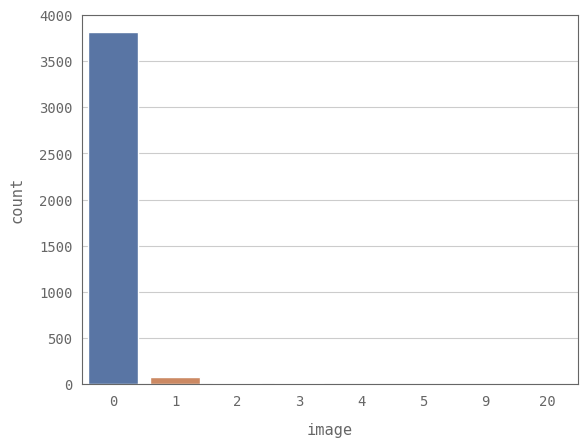

In [86]:
sns.countplot(x='image', data=df_email)

Create a new variable called has_image that is TRUE where the number of images is greater than zero and FALSE otherwise.
Create an appropriate plot with email to visualize the relationship between has_image and spam.

In [87]:
df_email['has_image'] = df_email.image != 0
df_email[['image', 'has_image']]

,image,has_image
0,0,False
1,0,False
2,0,False
3,0,False
4,0,False
...,...,...
3916,0,False
3917,0,False
3918,0,False
3919,0,False


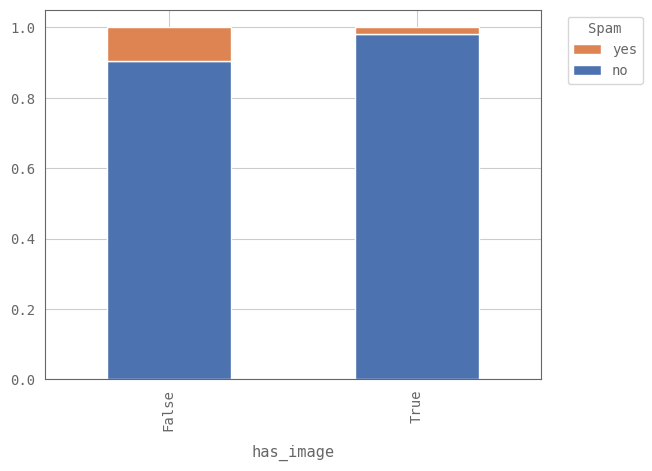

In [88]:
ax = df_email.groupby(by='has_image').spam.value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],frameon=True, bbox_to_anchor=(1.04,1), loc="upper left", title='Spam')

Data Integrity

In [89]:
# Test for negative values in num_char
(df_email.num_char < 0).sum()

0

In [90]:
# Test if images count as attached files
(df_email.loc[df_email.image > 0, 'attach'] == 0).sum()

0

Answering questions with chains

“Within non-spam emails, is the typical length of emails shorter for those that were sent to multiple people?”

In [91]:
(df_email[df_email.spam == 'no'].groupby('to_multiple')
                                .num_char.agg('median')
)

to_multiple
0    7.1960
1    5.3645
Name: num_char, dtype: float64

In [92]:
df_email.spam.value_counts()

no     3554
yes     367
Name: spam, dtype: int64

Build a chain to answer each of the following questions, both about the variable dollar.

For emails containing the word “dollar”, does the typical spam email contain a greater number of occurrences of the word than the typical non-spam email? Create a summary statistic that answers this question.

In [93]:
df_email[df_email.dollar > 0].groupby('spam').dollar.agg('median')

spam
no     4.0
yes    2.0
Name: dollar, dtype: float64

If you encounter an email with greater than 10 occurrences of the word “dollar”, is it more likely to be spam or not spam? Create a bar plot that answers this question.

<AxesSubplot: xlabel='spam'>

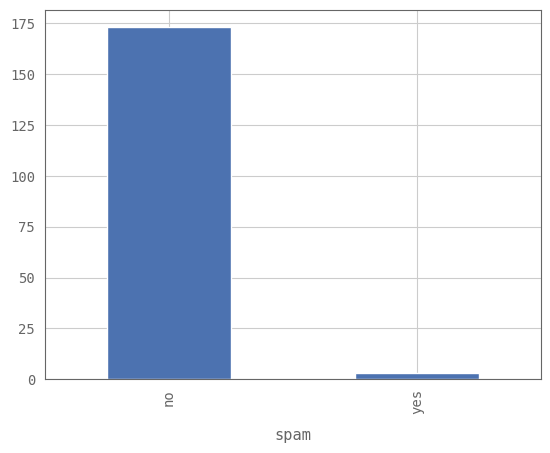

In [94]:
df_email[df_email.dollar > 10].groupby('spam').dollar.count().plot(kind='bar')

Looking at the number variable  

To explore the association between this variable and spam, select and construct an informative plot. For illustrating relationships between categorical variables, you’ve seen

Faceted bar plots
Side-by-side bar plots
Stacked and normalized bar plots.
Let’s practice constructing a faceted bar plot.

Construct a faceted bar plot of the association between number and spam.
You should facet by number

In [95]:
df_email.number.value_counts()

small    2827
none      549
big       545
Name: number, dtype: int64

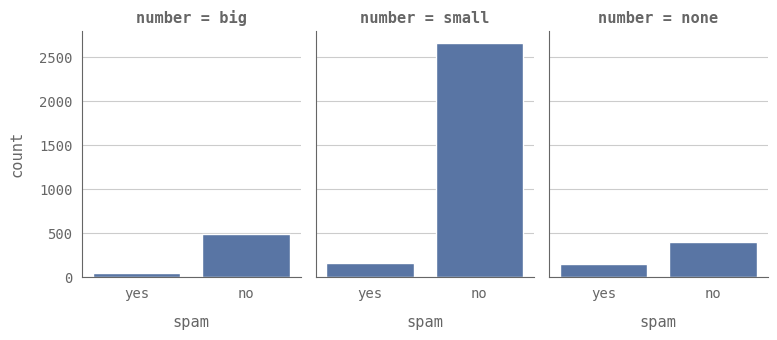

In [96]:
# Make a FacetGrid plot

g = sns.FacetGrid(df_email, col='number', height=3.5, aspect=.75)
g.map(sns.countplot, 'spam', order=['yes', 'no'])

From the above it looks like mails with no numbers are most likely to be spam mails.  
A proportion plot would likely show this more clearly.

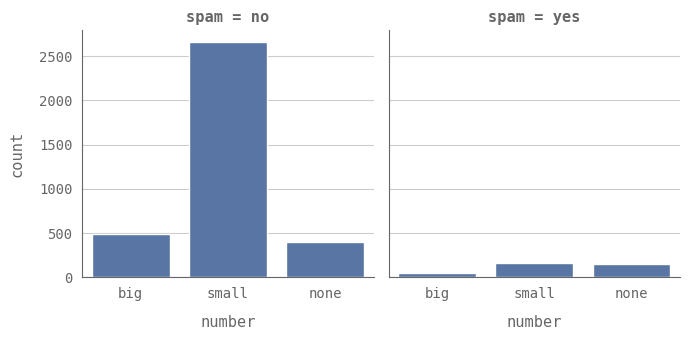

In [97]:
# Make another FacetGrid switching the variables

g = sns.FacetGrid(df_email, col='spam', height=3.5, aspect=1)
g.map(sns.countplot, 'number', order=['big', 'small', 'none'])

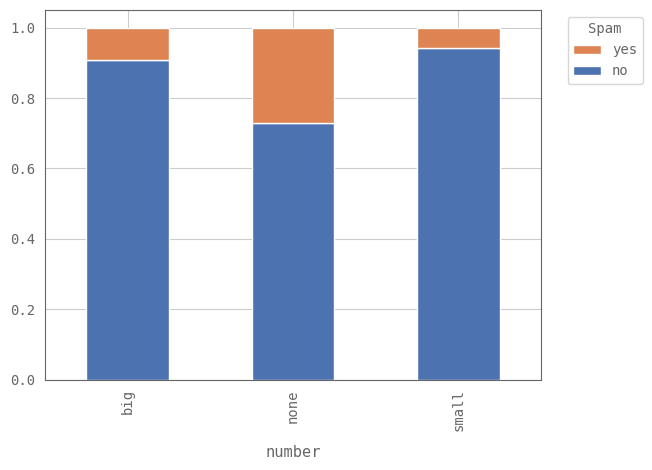

In [98]:
ax = df_email.groupby(by='number').spam.value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],frameon=True, bbox_to_anchor=(1.04,1), loc="upper left", title='Spam')